Model Trained
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



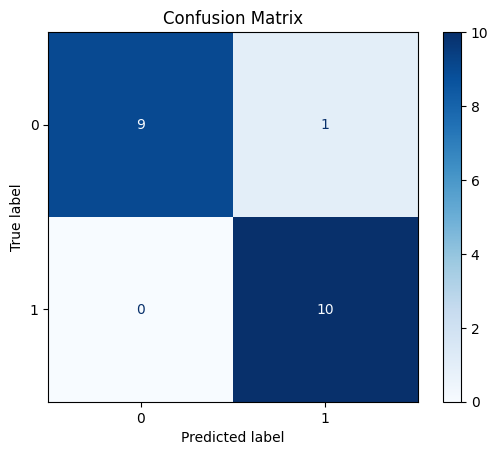

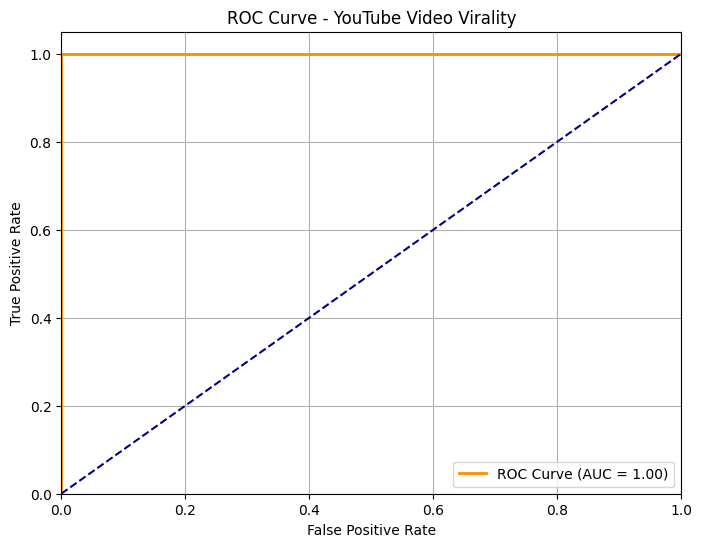

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
# load the dataset
df = pd.read_csv("/content/youtube_dataset.csv")
#encode the 'Category' column
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
# select features and target
x = df.drop(['Video_ID', 'Is_Viral'], axis=1)
y = df['Is_Viral']
# scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
#train-test spilt
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
# train the model
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)
# predict and evalution
y_pred = model.predict(x_test)
print("Model Trained")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# confusion_matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
# roc curve
y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds =roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange' , lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1],[0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - YouTube Video Virality')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()